In [1]:
%matplotlib inline

from fermi_model import * 

states3 = csv_to_states_from_filename('states3.csv')

In [57]:
adj = Fermi.get_adj_matrix(states3)

In [58]:
# adj += adj.T
adj = adj.T

In [9]:
# plt.figure(figsize=(3, 3))
# plt.pcolormesh(adj, cmap="copper")
# plt.title(r"$S_{ij}$ (iからjへの遷移)", fontsize=20)
# plt.xlabel('j', fontsize=20)
# plt.ylabel('i', fontsize=20)
# plt.ylim(adj.shape[0] - 1, 0)
# plt.show()

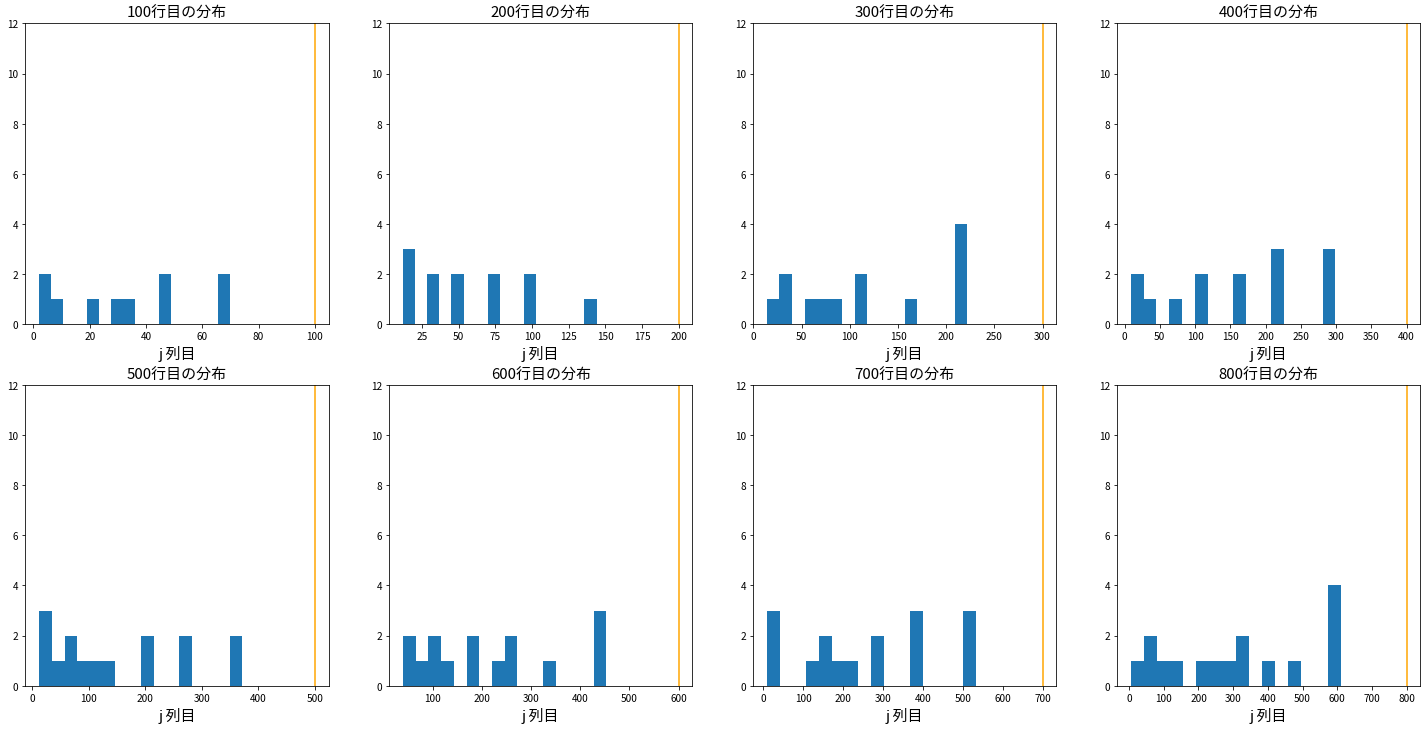

In [61]:

bin_num = 16

fig = plt.figure(figsize=(25, 8))
fig.subplots_adjust(left=0.125,
right=0.9,
bottom=0.05,
top=1.2,
wspace=0.2,
hspace=0.2)
range_size = 8
for i in range(0, range_size):
    row = (i+1) * 30
    ax = fig.add_subplot(2, 4, i+1)
    ax.hist(np.where(adj[row] == 1), bins=bin_num)
    ax.set_title(f"{row}行目の分布", fontsize=15)
    ax.set_xlabel("j 列目", fontsize=15)
    ylim = 12
    ax.set_ylim(0, ylim)
    ax.vlines(x=row, ymin=0, ymax=ylim, color="orange")
plt.show()


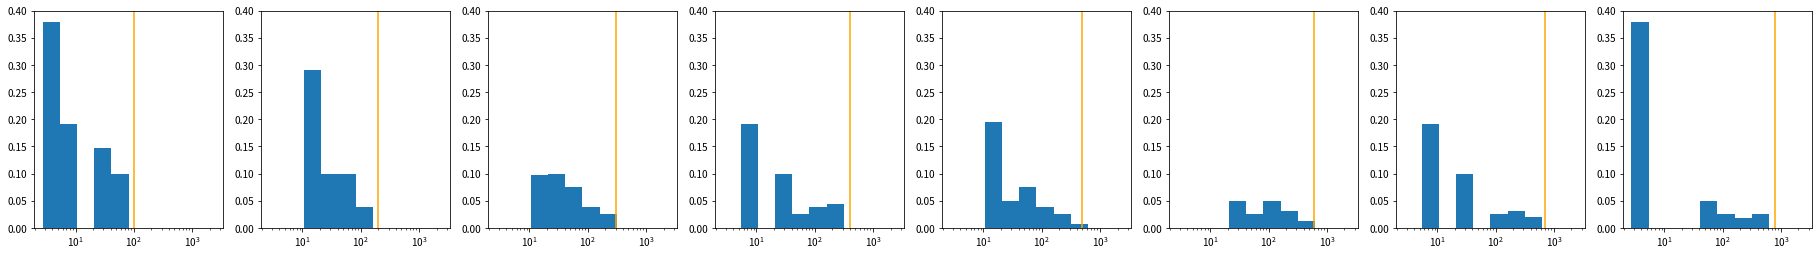

In [62]:

fig = plt.figure(figsize=(40, 4))
for i in range(0, 8):
    row = (i+1) * 30
    bins = np.logspace(start=1, stop=np.log(adj.shape[0]), num=11, base=np.e)
    hist = np.histogram(np.where(adj[row] == 1), bins=bins)[0] / np.diff(bins) # 密度としてSを考えている
    # hist = np.histogram(np.where(adj[row] == 1), bins=bins)[0]
    ax = fig.add_subplot(1, 3, i+1)
    ax.bar(bins[:-1], hist, width=np.diff(bins), align="edge")
    ax.set_xscale("log")
    
    ax.set_ylim(0, 0.4)
    ax.vlines(x=row, ymin=0, ymax=0.4, color="orange")
plt.show()


In [9]:
hist

array([0.37808059, 0.        , 0.        , 0.        , 0.04989875,
       0.02529056, 0.01922731, 0.025987  , 0.00823199, 0.01251685])

In [3]:
# dct = {状態のidx: {遷移先が3εのルート数: 1個, 遷移先が2εのルート数: 5個}}
def calc_state2dct(states, kind: str='both'):
    if not kind in ['deexcitation', 'excitation', 'both']:
        raise Exception('引数kindは "excitation", "deexcitation", "both" のいずれか')
    num_states = len(states)
    dct = dict()
    if kind == 'deexcitation':
        for i in range(1, num_states):
            dct[i] = dict()
            for j in range(0, i):
                if Fermi.is_connected(states[i], states[j]):
                    energy = states[j].score
                    if dct[i].get(energy):
                        dct[i][energy] += 1
                    else:
                        dct[i][energy] = 1
    elif kind == 'excitation':
        for i in range(0, num_states):
            dct[i] = dict()
            for j in range(i+1, num_states):
                if Fermi.is_connected(states[i], states[j]):
                    energy = states[j].score
                    if dct[i].get(energy):
                        dct[i][energy] += 1
                    else:
                        dct[i][energy] = 1
    else:
        for i in range(num_states):
            dct[i] = dict()
            for j in range(num_states):
                if Fermi.is_connected(states[i], states[j]):
                    energy = states[j].score
                    if dct[i].get(energy):
                        dct[i][energy] += 1
                    else:
                        dct[i][energy] = 1
    return dct

# dct = {エネルギー: {遷移先が3εのルート数: 1個, ...}}
def calc_score2dct(states, kind: str='both'):
    if not kind in ['deexcitation', 'excitation', 'both']:
        raise Exception('引数kindは "excitation", "deexcitation", "both" のいずれか')
    num_states = len(states)
    dct = dict()
    if kind == 'deexcitation':
        for i in range(1, num_states):
            for j in range(0, i):
                if Fermi.is_connected(states[i], states[j]):
                    now_score = states[i].score
                    post_score = states[j].score
                    if not dct.get(now_score):
                        dct[now_score] = {}
                    if dct[now_score].get(post_score):
                        dct[now_score][post_score] += 1
                    else:
                        dct[now_score][post_score] = 1
    elif kind == 'excitation':
        for i in range(0, num_states):
            for j in range(i+1, num_states):
                if Fermi.is_connected(states[i], states[j]):
                    now_score = states[i].score
                    post_score = states[j].score
                    if not dct.get(now_score):
                        dct[now_score] = {}
                    if dct[now_score].get(post_score):
                        dct[now_score][post_score] += 1
                    else:
                        dct[now_score][post_score] = 1
    else:
        for i in range(num_states):
            for j in range(num_states):
                if Fermi.is_connected(states[i], states[j]):
                    now_score = states[i].score
                    post_score = states[j].score
                    if not dct.get(now_score):
                        dct[now_score] = {}
                    if dct[now_score].get(post_score):
                        dct[now_score][post_score] += 1
                    else:
                        dct[now_score][post_score] = 1
    return dct

In [4]:
state2dct_de = calc_state2dct(states=states3, kind='deexcitation')
state2dct_ex = calc_state2dct(states=states3, kind='excitation')

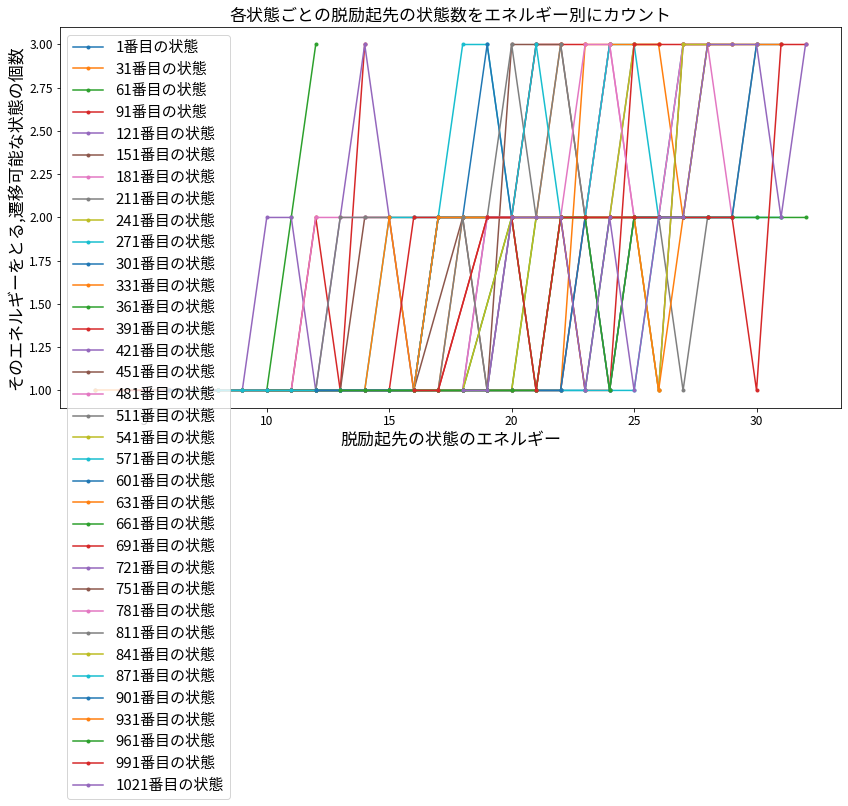

In [5]:
plt.figure(figsize=(14, 7))
for row in range(1, len(states3), 30):
    score2num = state2dct_de[row] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    nums = np.fromiter(score2num.values(), dtype=int)
    plt.plot(scores, nums, '.-', label=f"{row}番目の状態")
    plt.legend(fontsize=15)
plt.title("各状態ごとの脱励起先の状態数をエネルギー別にカウント", fontsize=17)
plt.xlabel("脱励起先の状態のエネルギー", fontsize=17)
plt.ylabel("そのエネルギーをとる,遷移可能な状態の個数", fontsize=17)
plt.show()

In [6]:
def calc_degeneracies(states: list[State]):
    """実際の縮退度を計算"""
    dct = {}
    for state in states:
        if dct.get(state.score):
            dct[state.score] += 1
        else:
            dct[state.score] = 1
    degeneracies = np.fromiter(dct.values(), dtype=int)
    return degeneracies

In [7]:
degeneracies3 = calc_degeneracies(states3)

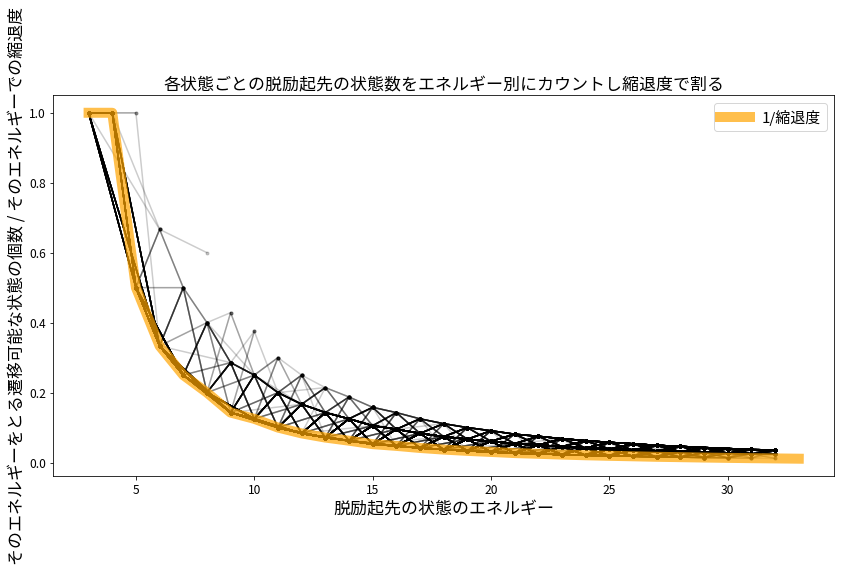

In [8]:
# 脱励起のみを考える
scores3 = Fermi.get_scores(states3)
plt.figure(figsize=(14, 7))
# for row in range(0, len(states3), 20):
for row in range(1, len(states3)):
    score2num = state2dct_de[row] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    not_duplicated_scores = [score for score in scores3 if score not in scores]
    nums = np.fromiter(score2num.values(), dtype=int)
    rates = nums / [degeneracy for degeneracy, score in zip(degeneracies3, scores3) if score not in not_duplicated_scores]
    # plt.plot(scores, rates, '.-', label=f"{row}番目の状態", alpha=0.2, color="black")
    plt.plot(scores, rates, '.-', alpha=0.2, color="black")
plt.plot(scores3, 1 / degeneracies3, '-', linewidth=10, alpha=0.7, color="orange", label="1/縮退度")
plt.legend(fontsize=15)
plt.title("各状態ごとの脱励起先の状態数をエネルギー別にカウントし縮退度で割る", fontsize=17)
plt.xlabel("脱励起先の状態のエネルギー", fontsize=17)
plt.ylabel("そのエネルギーをとる遷移可能な状態の個数 / そのエネルギーでの縮退度", fontsize=17)
plt.show()

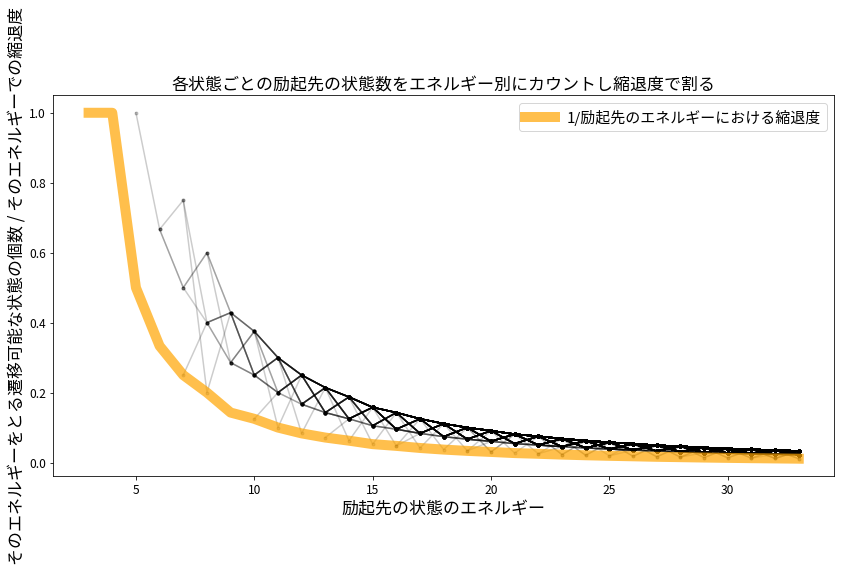

In [9]:
# 励起のみを考える
scores3 = Fermi.get_scores(states3)
plt.figure(figsize=(14, 7))
# for row in range(0, len(states3), 20):
for row in range(1, len(states3)):
    score2num = state2dct_ex[row] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    not_duplicated_scores = [score for score in scores3 if score not in scores]
    nums = np.fromiter(score2num.values(), dtype=int)
    rates = nums / [degeneracy for degeneracy, score in zip(degeneracies3, scores3) if score not in not_duplicated_scores]
    # plt.plot(scores, rates, '.-', label=f"{row}番目の状態", alpha=0.2, color="black")
    plt.plot(scores, rates, '.-', alpha=0.2, color="black")
# plt.plot(3 + np.array(scores3), 1 / degeneracies3, '-', linewidth=10, alpha=0.7, color="orange", label="1/励起先のエネルギーにおける縮退度") # 粒子数だけ縮退度をスライド(ρ(E-n))
plt.plot(np.array(scores3), 1 / degeneracies3, '-', linewidth=10, alpha=0.7, color="orange", label="1/励起先のエネルギーにおける縮退度")
plt.legend(fontsize=15)
plt.title("各状態ごとの励起先の状態数をエネルギー別にカウントし縮退度で割る", fontsize=17)
plt.xlabel("励起先の状態のエネルギー", fontsize=17)
plt.ylabel("そのエネルギーをとる遷移可能な状態の個数 / そのエネルギーでの縮退度", fontsize=17)
plt.show()

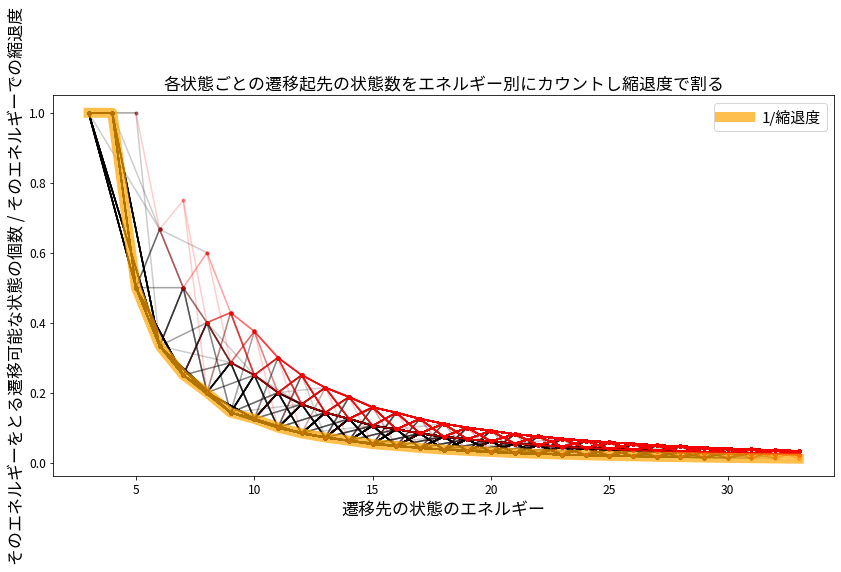

In [10]:
scores3 = Fermi.get_scores(states3)
plt.figure(figsize=(14, 7))
# for row in range(0, len(states3), 20):
for row in range(1, len(states3)):
    score2num = state2dct_de[row] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    not_duplicated_scores = [score for score in scores3 if score not in scores]
    nums = np.fromiter(score2num.values(), dtype=int)
    rates = nums / [degeneracy for degeneracy, score in zip(degeneracies3, scores3) if score not in not_duplicated_scores]
    # plt.plot(scores, rates, '.-', label=f"{row}番目の状態", alpha=0.2, color="black")
    plt.plot(scores, rates, '.-', alpha=0.2, color="black")
for row in range(1, len(states3)):
    score2num = state2dct_ex[row] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    not_duplicated_scores = [score for score in scores3 if score not in scores]
    nums = np.fromiter(score2num.values(), dtype=int)
    rates = nums / [degeneracy for degeneracy, score in zip(degeneracies3, scores3) if score not in not_duplicated_scores]
    # plt.plot(scores, rates, '.-', label=f"{row}番目の状態", alpha=0.2, color="black")
    plt.plot(scores, rates, '.-', alpha=0.2, color="red")
plt.plot(scores3, 1 / degeneracies3, '-', linewidth=10, alpha=0.7, color="orange", label="1/縮退度")
plt.legend(fontsize=15)
plt.title("各状態ごとの遷移起先の状態数をエネルギー別にカウントし縮退度で割る", fontsize=17)
plt.xlabel("遷移先の状態のエネルギー", fontsize=17)
plt.ylabel("そのエネルギーをとる遷移可能な状態の個数 / そのエネルギーでの縮退度", fontsize=17)
plt.show()

In [11]:
def calc_degeneracy_dct(states):
    """実際の縮退度を計算"""
    dct = {}
    for state in states:
        if dct.get(state.score):
            dct[state.score] += 1
        else:
            dct[state.score] = 1
    return dct

In [12]:
degeneracy_dct = calc_degeneracy_dct(states3)
score2dct_de = calc_score2dct(states3, kind='deexcitation')
score2dct_ex = calc_score2dct(states3, kind='excitation')

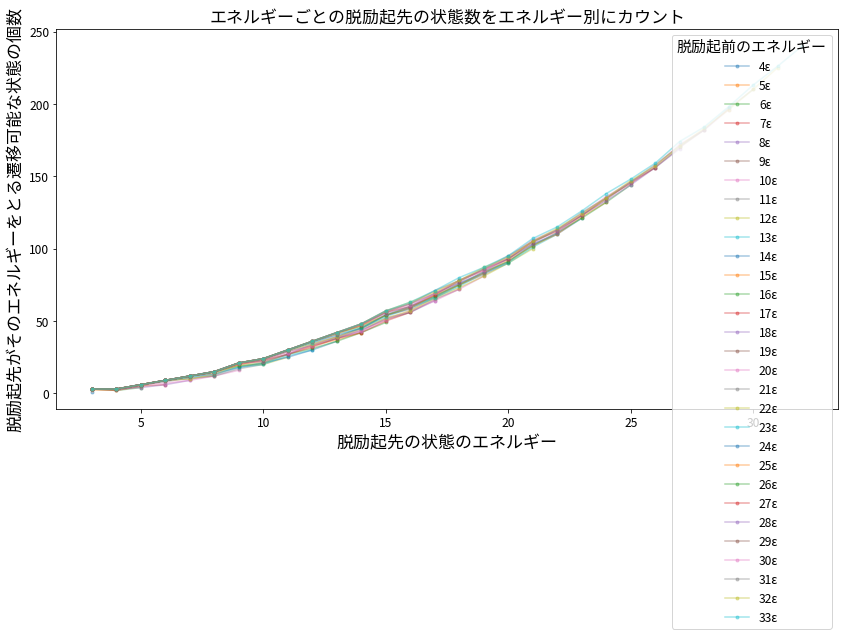

In [13]:
scores3 = Fermi.get_scores(states3)
plt.figure(figsize=(14, 7))
for score in scores3[1:]:
    score2num = score2dct_de[score] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    nums = np.fromiter(score2num.values(), dtype=int)
    degeneracy = degeneracy_dct[score]
    plt.plot(scores, nums, '.-', alpha=0.4, label=f"{score}ε")
plt.legend(title="脱励起前のエネルギー", title_fontsize=15)
plt.title("エネルギーごとの脱励起先の状態数をエネルギー別にカウント", fontsize=17)
plt.xlabel("脱励起先の状態のエネルギー", fontsize=17)
plt.ylabel("脱励起先がそのエネルギーをとる遷移可能な状態の個数", fontsize=17)
plt.show()

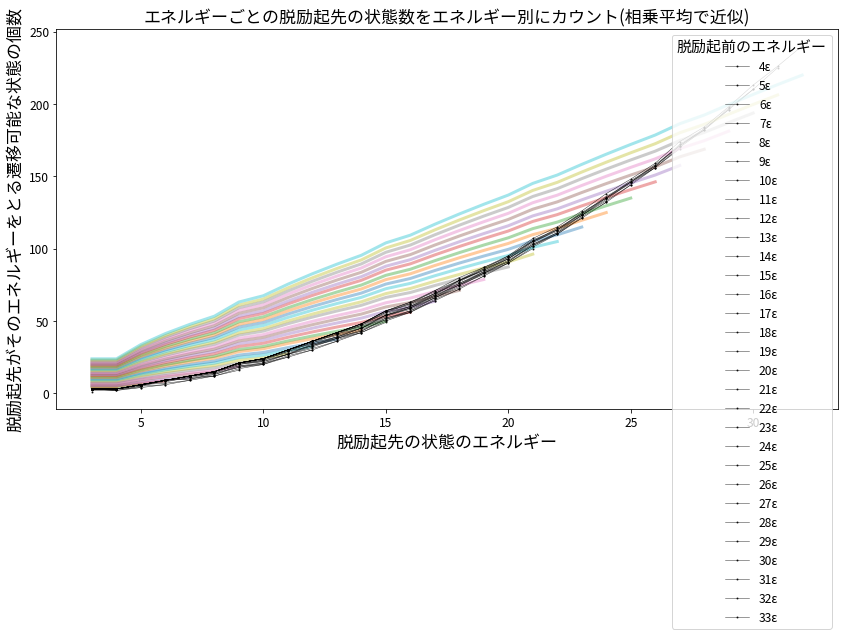

In [14]:
S = 2.5
scores3 = Fermi.get_scores(states3)
plt.figure(figsize=(14, 7))
for score in scores3[1:]:
    score2num = score2dct_de[score] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    nums = np.fromiter(score2num.values(), dtype=int)
    degeneracy = degeneracy_dct[score]
    # plt.plot(scores, nums, '.-', alpha=0.5, label=f"{score}ε")
    plt.plot(scores, nums, '.-', alpha=0.8, linewidth=0.5, ms=2, label=f"{score}ε", color="black")
    # plt.plot(scores, degeneracy * degeneracies10[:score-min(scores3)] * S, '-', alpha=0.2, linewidth=5)
    plt.plot(scores, S * (degeneracy * degeneracies3[:score-min(scores3)])**0.5, '-', alpha=0.4, linewidth=3) #
plt.legend(title="脱励起前のエネルギー", title_fontsize=15)
plt.title("エネルギーごとの脱励起先の状態数をエネルギー別にカウント(相乗平均で近似)", fontsize=17)
plt.xlabel("脱励起先の状態のエネルギー", fontsize=17)
plt.ylabel("脱励起先がそのエネルギーをとる遷移可能な状態の個数", fontsize=17)
plt.show()

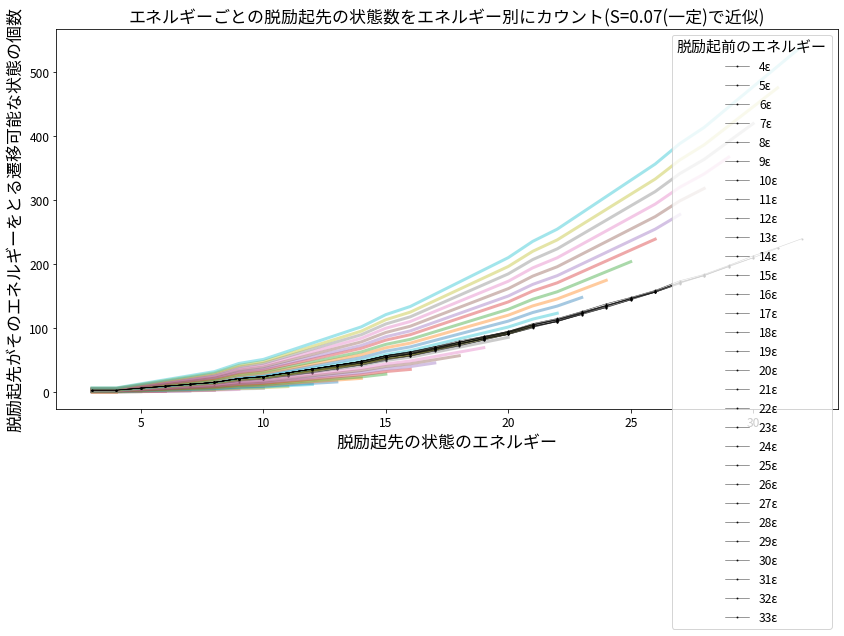

In [15]:
S = 0.07
scores3 = Fermi.get_scores(states3)
plt.figure(figsize=(14, 7))
for score in scores3[1:]:
    score2num = score2dct_de[score] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    nums = np.fromiter(score2num.values(), dtype=int)
    degeneracy = degeneracy_dct[score]
    # plt.plot(scores, nums, '.-', alpha=0.5, label=f"{score}ε")
    plt.plot(scores, nums, '.-', alpha=0.8, linewidth=0.5, ms=2, label=f"{score}ε", color="black")
    plt.plot(scores, degeneracy * degeneracies3[:score-min(scores3)] * S, '-', alpha=0.4, linewidth=3)
plt.legend(title="脱励起前のエネルギー", title_fontsize=15)
plt.title(f"エネルギーごとの脱励起先の状態数をエネルギー別にカウント(S={S}(一定)で近似)", fontsize=17)
plt.xlabel("脱励起先の状態のエネルギー", fontsize=17)
plt.ylabel("脱励起先がそのエネルギーをとる遷移可能な状態の個数", fontsize=17)
plt.show()

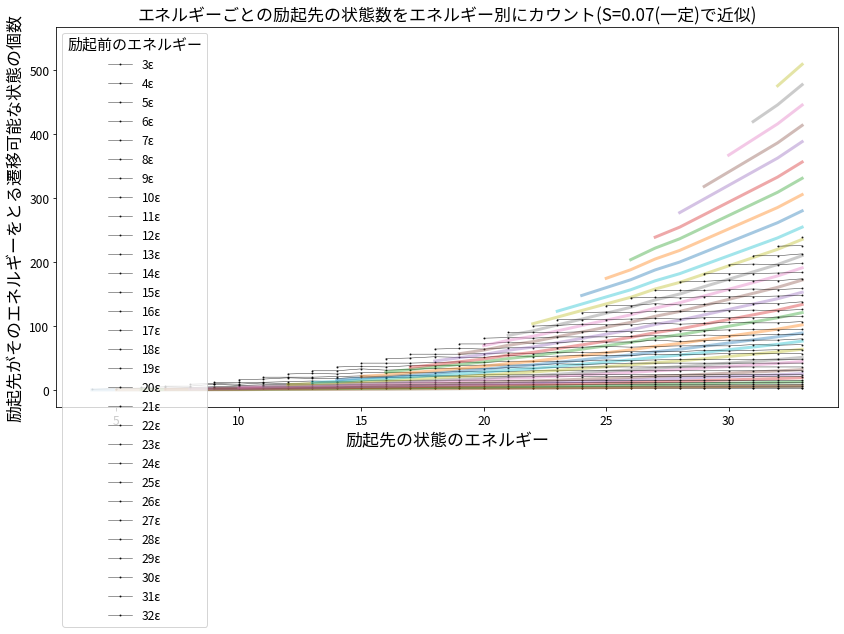

In [16]:
S = 0.07
scores3 = Fermi.get_scores(states3)
plt.figure(figsize=(14, 7))
for score in scores3[:-1]:
    score2num = score2dct_ex[score] # {遷移先が3εのルート数: 1個, ...}
    scores = np.fromiter(score2num.keys(), dtype=int)
    nums = np.fromiter(score2num.values(), dtype=int)
    degeneracy = degeneracy_dct[score]
    plt.plot(scores, nums, '.-', alpha=0.8, linewidth=0.5, ms=2, label=f"{score}ε", color="black")
    plt.plot(scores, degeneracy * degeneracies3[score - min(scores3) + 1:] * S, '-', alpha=0.4, linewidth=3)
plt.legend(title="励起前のエネルギー", title_fontsize=15)
plt.title(f"エネルギーごとの励起先の状態数をエネルギー別にカウント(S={S}(一定)で近似)", fontsize=17)
plt.xlabel("励起先の状態のエネルギー", fontsize=17)
plt.ylabel("励起先がそのエネルギーをとる遷移可能な状態の個数", fontsize=17)
plt.show()

In [28]:
len(states3)

358

In [31]:
# sum_matrix = np.sum(adj, axis=1)

def foo(states):
    # dct = {エネルギー: 遷移可能なルート数}
    num_states = len(states)
    dct = dict()
    for i in range(1, num_states):
        for j in range(0, i):
            if Fermi.is_connected(states[i], states[j]):
                score = states[j].score
                if dct.get(score):
                    dct[score] += 1
                else:
                    dct[score] = 1
    return dct

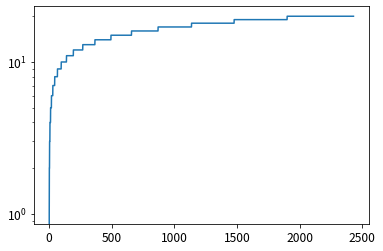

In [30]:
plt.plot(np.arange(0, adj.shape[0]), sum_matrix)
plt.yscale("log")
plt.show()

In [32]:
score2transitionable_num = foo(states3)

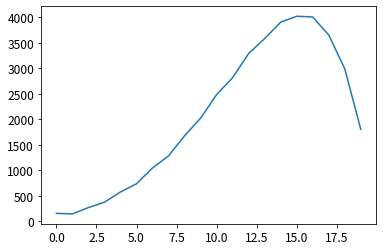

In [52]:
scores = np.fromiter(score2transitionable_num.keys(), dtype=int)
transitionable_nums = np.fromiter(score2transitionable_num.values(), dtype=int)
plt.plot(scores - scores[0], transitionable_nums)
# plt.yscale("log")
plt.show()